In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

print(tf.__version__)

Using TensorFlow backend.


2.2.0


# Get the data

In [2]:
dataset = keras.datasets.mnist

train, test = dataset.load_data()

(train_images, train_labels) = train
(test_images, test_labels) = test

# Explore the data

A first look at the data:

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Check the shape of the data

In [4]:
train_images.shape

(60000, 28, 28)

Ok, there are 60000 samples, each 28x28 elements.

## Lets check the inputs 
Let's view the data as images

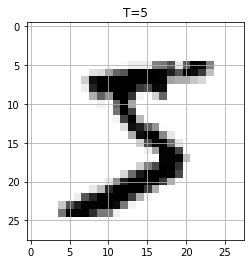

In [12]:
def showImage(image, show=True, showGrid=False, showAsAnnotation=True, showColorBar=False, showTicks=False, annoColor='yellow', **kwargs):
    plt.imshow(image, cmap=plt.cm.binary)

    if showColorBar: plt.colorbar()
    if showGrid: plt.grid()
    if not showTicks:
        plt.xticks([])
        plt.yticks([])
    text=", ".join(["%s=%s" % kv for kv in kwargs.items()])
    if (text != ""):
        if showAsAnnotation: 
            plt.annotate(text, xy=(2, 26), xycoords='data', bbox=dict(color=annoColor, alpha=0.7)) 
        else: 
            plt.title(text)
    if show: plt.show()

iid = 0
showImage(train_images[iid], showGrid=True, showTicks=True, showAsAnnotation=False, T=train_labels[iid])


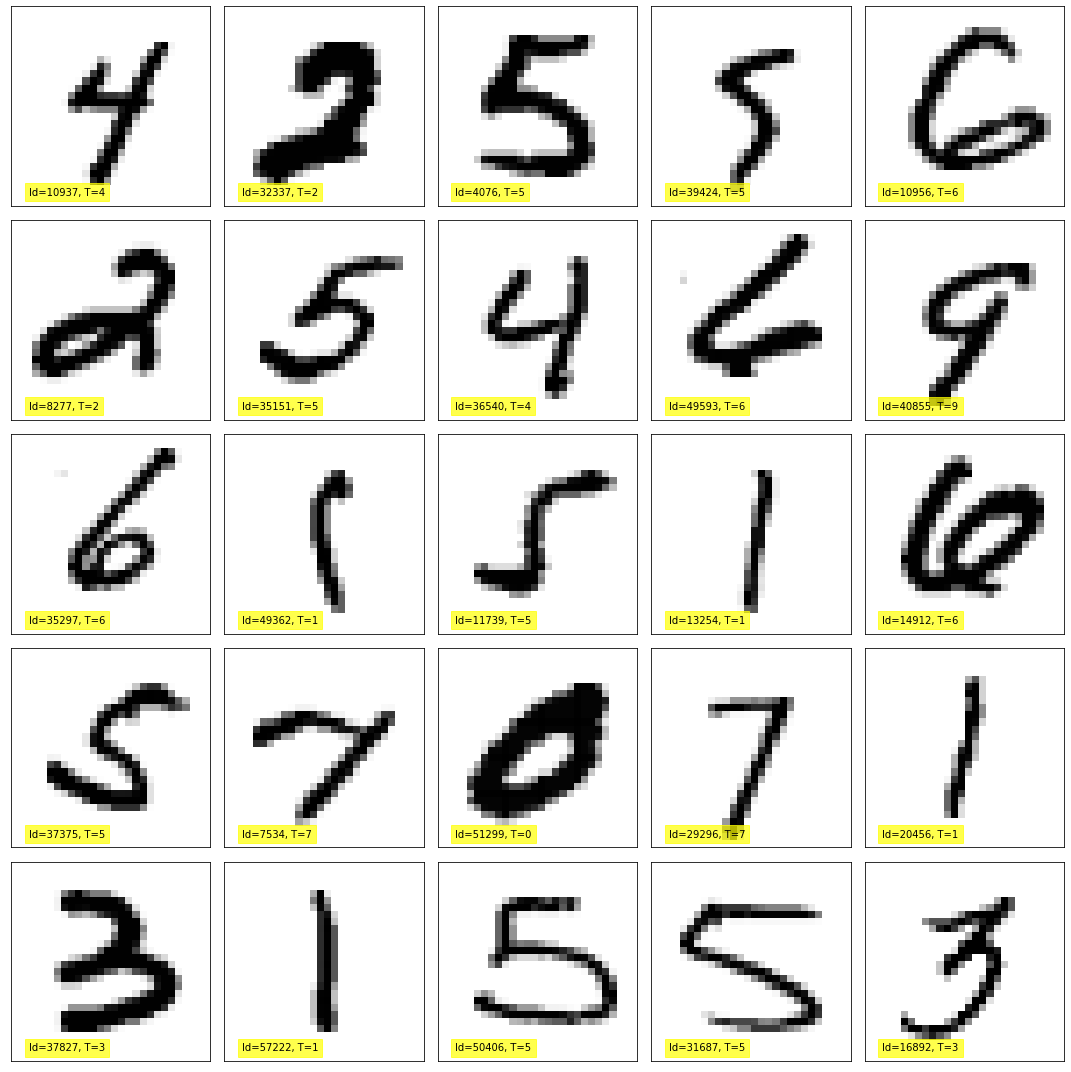

In [6]:
plt.figure(figsize=(15,15))
for i in range(25):
    iid = random.randint(0,train_images.shape[0]-1)
    plt.subplot(5,5,i+1)
    showImage(train_images[iid], Id=iid, T=train_labels[iid], show=False)
plt.tight_layout()
plt.show()


In [7]:
pd.DataFrame(train_images.reshape(60000,28*28)).describe()

0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std        0.0      0.0  ...      6.042472      3.956189      2.839845   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

                777           778         779      780      781      782  \
count  60000.000000  60000.000000  60000.0000  60000.0  60000.0  60000.0   
mean       0.019283      0.015117      0.0020      0.0      0.0      0.0   
std        1.686770      1.678283      0.3466      0.0      0.0      0.0   
min        0.000000      0.000000      0.0000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.0000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.0000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.0000      0.0      0.0      0.0   
max      253.000000    254.000000     62.0000      0.0      0.0      0.0   

           783  
count  60000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

### Statistical features of a random pixel over all samples

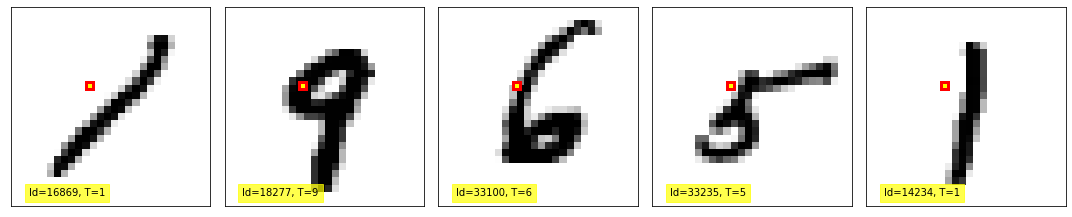

0
count  60000.000000
mean     100.225900
std      110.356359
min        0.000000
25%        0.000000
50%       32.000000
75%      241.000000
max      255.000000

In [9]:
x,y = 10,10

plt.figure(figsize=(15,15))
for i in range(5):
    iid = random.randint(0,train_images.shape[0]-1)
    a=plt.subplot(1,5,i+1)
    showImage(train_images[iid], Id=iid, T=train_labels[iid], show=False)
    a.add_patch(Rectangle((x,y),1,1,linewidth=3,edgecolor='red',facecolor='yellow'))
plt.tight_layout()
plt.show()

pd.DataFrame(train_images[:,x,y]).describe()

### Check means and standard deviations for training data

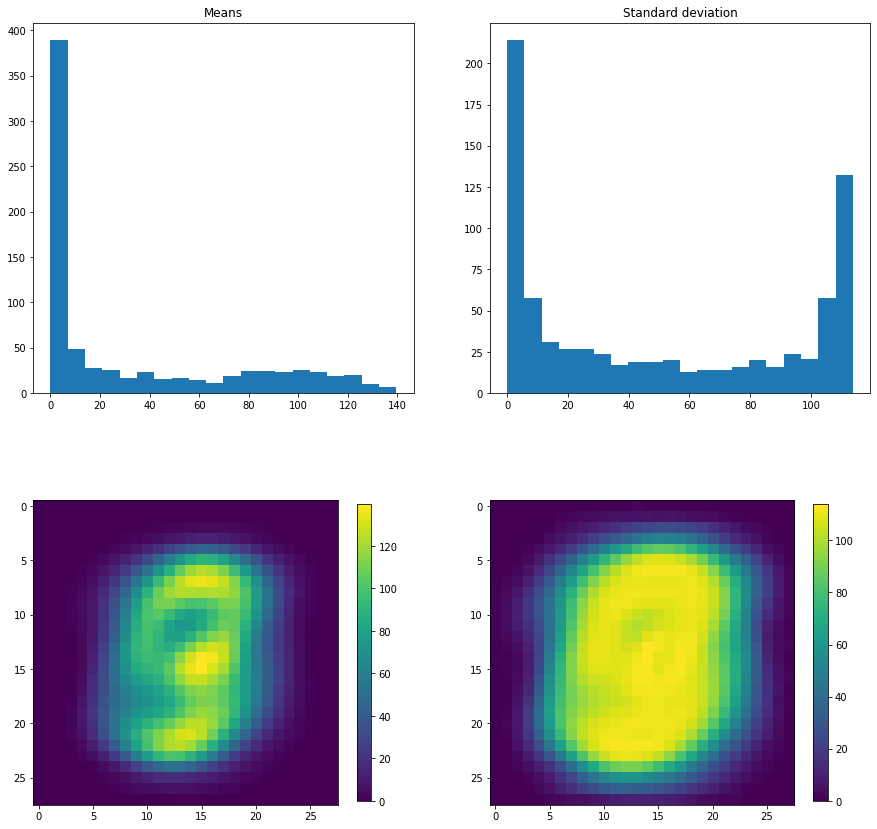

Means: mean=33.318, std=42.424
Stds:  mean=49.271, std=44.106


In [10]:
stds = train_images.reshape(60000,28*28).std(0)
means = train_images.reshape(60000,28*28).mean(0)

fig = plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.hist(means, bins=20)
plt.title("Means")

plt.subplot(2,2,2)
plt.hist(stds, bins=20)
plt.title("Standard deviation")

ax =plt.subplot(2,2,3)
plt.imshow(means.reshape(28,28))
plt.colorbar(shrink=0.8)

plt.subplot(2,2,4)
plt.imshow(stds.reshape(28,28))
plt.colorbar(shrink=0.8)

plt.show()
print("Means: mean=%2.3f, std=%2.3f" % (means.mean(), means.std()))
print("Stds:  mean=%2.3f, std=%2.3f" % (stds.mean(), stds.std()))


## Let's check the outputs

In [11]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [13]:
len(train_labels)

60000

### Regression vz. Classification

What is the difference between 1 and 4?
What is the difference between an image of a 1 and an image of a 4?

In [14]:
train_labels_c = to_categorical(train_labels)
test_labels_c  = to_categorical(test_labels)
train_labels_c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
for i in range(5):
    print(train_labels[i], train_labels_c[i])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
train_labels_c.shape

(60000, 10)

Let's check the distribution of the labels for train and test set

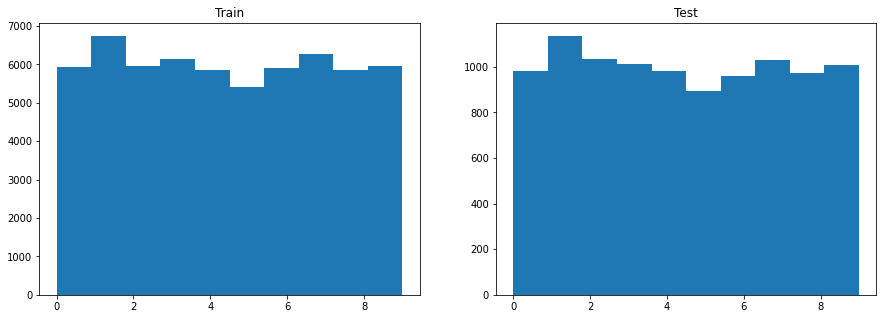

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(train_labels)
plt.title("Train")

plt.subplot(1,2,2)
plt.hist(test_labels)
plt.title("Test")

plt.show()

Now we can define a helper-function to reload the data to make sure it's all fresh and unaltered during the experiments!

In [18]:
def reloadDataset():
    global train_images, train_labels, test_images, test_labels, train_labels_c, test_labels_c
    dataset = keras.datasets.mnist # fashion_mnist
    train, test = dataset.load_data()
    
    (train_images, train_labels) = train
    (test_images, test_labels) = test

    train_labels_c = to_categorical(train_labels)
    test_labels_c  = to_categorical(test_labels)



# Lets try a simple MLP

Let's create a very simple Feed-Forward Network ...

Input- and output layer are fixed to be of shape (28,28) and (10), respectively.

We add one hidden layer with 20 units in between. 

In [25]:
reloadDataset()

model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


No we can create a simple Backprop-Optimizer and train our model ...

In [20]:
optimizer = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)

model.compile(
    optimizer=optimizer, 
    loss='mean_squared_error', 
    metrics=['categorical_accuracy'])

h=model.fit(train_images, train_labels_c, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 763us/step - loss: 0.0835 - categorical_accuracy: 0.4791
Epoch 2/20
1875/1875 [==============================] - 1s 749us/step - loss: 0.0657 - categorical_accuracy: 0.6521
Epoch 3/20
1875/1875 [==============================] - 2s 926us/step - loss: 0.0543 - categorical_accuracy: 0.7051
Epoch 4/20
1875/1875 [==============================] - 1s 771us/step - loss: 0.0475 - categorical_accuracy: 0.7275
Epoch 5/20
1875/1875 [==============================] - 2s 894us/step - loss: 0.0428 - categorical_accuracy: 0.7625
Epoch 6/20
1875/1875 [==============================] - 2s 825us/step - loss: 0.0393 - categorical_accuracy: 0.8121
Epoch 7/20
1875/1875 [==============================] - 2s 841us/step - loss: 0.0362 - categorical_accuracy: 0.8349
Epoch 8/20
1875/1875 [==============================] - 2s 824us/step - loss: 0.0340 - categorical_accuracy: 0.8407
Epoch 9/20
1875/1875 [==============================] - 2s 843us/step - 

Evaluate the performance on the test set ...

In [21]:
model.evaluate(test_images, test_labels_c)

313/313 [==============================] - 0s 686us/step - loss: 0.0228 - categorical_accuracy: 0.8707


[0.022750210016965866, 0.8707000017166138]

Lets check the predictions ...

In [22]:
predictions = model.predict(test_images)
predictions

array([[0.010575  , 0.0389168 , 0.02668852, ..., 0.89256394, 0.01559258,
        0.11302081],
       [0.03992674, 0.02237707, 0.8241399 , ..., 0.00560355, 0.08336362,
        0.01462272],
       [0.00185642, 0.9077889 , 0.0544225 , ..., 0.02536657, 0.071825  ,
        0.03431961],
       ...,
       [0.00912046, 0.00319061, 0.01457697, ..., 0.0353843 , 0.01848158,
        0.07361588],
       [0.12869006, 0.00555319, 0.02127475, ..., 0.01618916, 0.33341974,
        0.00707853],
       [0.01316535, 0.05476138, 0.03367776, ..., 0.00204319, 0.03344604,
        0.00444403]], dtype=float32)

Lets check some examples ...

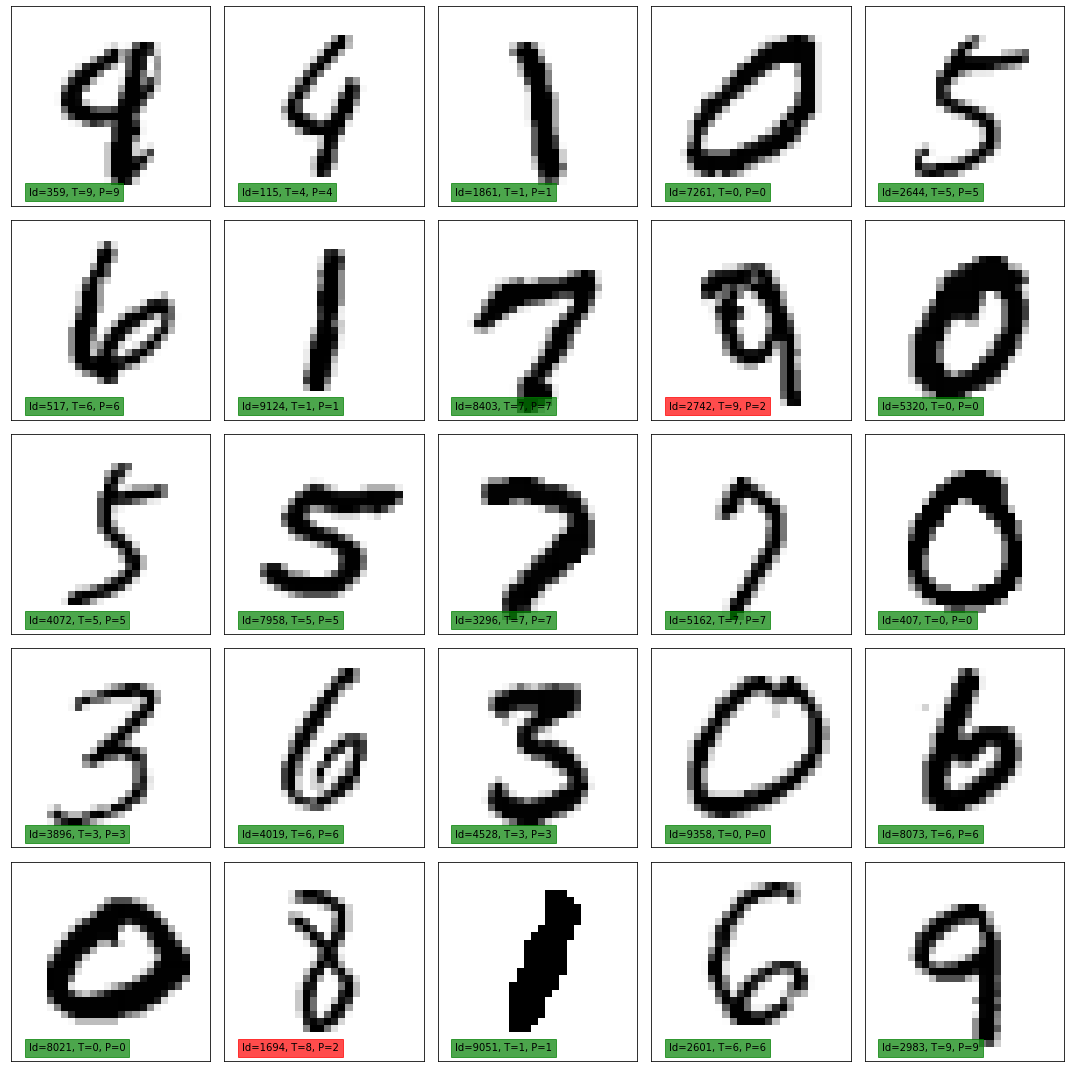

In [23]:
plt.figure(figsize=(15,15))
for i in range(25):
    a=plt.subplot(5,5,i+1)
    iid = random.randint(0,test_images.shape[0]-1)
    t=test_labels[iid]
    p=np.argmax(predictions[iid])
    showImage(test_images[iid], Id=iid, T=t, P=p, show=False, annoColor='green' if t==p else 'red')
plt.tight_layout()
plt.show()